# Trading_f function in python


## Download libraries and data

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
from datetime import datetime

pd.set_option('display.max_columns', 500)


Simbols  = ["BBVA.MC", "MEL.MC","TEF.MC","ACS.MC","SAN.MC","SAB.MC", "ITX.MC", "ANA.MC", "GRF.MC", "AENA.MC",
 "FER.MC","BKT.MC", "IBE.MC","ACX.MC","MTS.MC", "REE.MC", "AMS.MC", "VIS.MC", "IAG.MC", "SGRE.MC","MAP.MC",
 "COL.MC", "PHM.MC", "CLNX.MC", "ENG.MC",  "ELE.MC", "NTGY.MC","REP.MC", "MRL.MC","CABK.MC", "BKIA.MC", 
 "CIE.MC","IDR.MC","SLR.MC", "ALM.MC"]



Names = ["Banco Bilbao Vizcaya Argentaria, S.A.","Meliá Hotels International, S.A.",
"Telefónica, S.A.","ACS, Actividades de Construcción y Servicios, S.A.","Banco Santander, S.A.",
"Banco de Sabadell, S.A.","Industria de Diseño Textil, S.A.","Acciona, S.A.","Grifols, S.A.",
"Aena S.M.E., S.A.","Ferrovial, S.A.","Bankinter, S.A.","Iberdrola, S.A.","Acerinox, S.A.","ArcelorMittal","Red Eléctrica Corporación, S.A.",
"Amadeus IT Group, S.A.","Viscofan, S.A.","International Consolidated Airlines Group, S.A.","Siemens Gamesa Renewable Energy, S.A.",
"Mapfre, S.A.","Inmobiliaria Colonial, SOCIMI, S.A.","Pharma Mar, S.A.","Cellnex Telecom, S.A.","Enagás, S.A.",
"Endesa, Sociedad Anonima","Naturgy Energy Group, S.A.","Repsol, S.A.",
"MERLIN Properties SOCIMI, S.A.","CaixaBank, S.A.","Bankia","CIE Automotive", "Indra","Solaria Energía y Medio Ambiente, S.A.",
"Almirall, S.A"]


IbexNames = pd.DataFrame(
{
    'Companie' : Names,
    'Simbol' : Simbols
})


# If I want to always take data from 3 months ago

DATE = str(date.today().day) + '-' + str(date.today().month - 3) + '-' + str(date.today().year)

panel_data = data.DataReader(Simbols, 'yahoo', start= DATE)


df = pd.DataFrame(panel_data['Adj Close'])

C:\Users\Usuario\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BKIA.MC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [2]:
from IPython.display import display, Math, Latex

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

### Investment rule:

Understanding the inversion rule requires knowledge of time series analysis concepts, mainly stationarity. 

The inversion rule is simple but useful knowing that the returns of a financial series are stationary *(diff(log(x)))*, we can observe how due to this stationarity the series fluctuates around a value *(0 usually)*, therefore we know that if the returns move far away from that value, they will return to it, we do not know when but it is certain that the series will cross that value again. The only thing our investment rule does is:
* Buy when the value of the return of the series is below one x quantile of the series. 
    * Example: Yt = 10, Yt-1 = 100, mean = 100
    * yield = (10 - 100)/100 = -0.9 
    * The value of the series is very low, it is a good time to buy.

And the opposite case

* Sell when the value of the series return is above one x quantile of the series.
    * Example: Yt = 100, Yt-1 = 10, mean = 10
    * yield = (100 - 10)/10 = 9 
    * The value of the series is very high, it is a good time to sell.
    

It is automated so that if the value meets the rule it is bought/sold at the closing value, and sold/bought at the closing value of the next day. 



In [3]:
display(Math(r'Buy:'))

display(Math(r'Y_t = 10,\ Y_{t-1} = 100,\ \bar Y = 100'))

display(Math(r'rent = \frac{Y_t - Y_{t-1}}{Y_{t-1} } = \frac{(10 - 100)}{100} = -0.9'))

display(Math(r'Value\ is\ very\ low\ it\ is\ a\ good\ time\ to\ buy'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
display(Math(r'Sell:'))

display(Math(r'Y_t = 100,\ Y_{t-1} = 10,\ \bar Y = 10'))

display(Math(r'rent = \frac{Y_t - Y_{t-1}}{Y_{t-1} } = \frac{(100 - 10)}{10} = 9'))

display(Math(r'Value\ is\ very\ high\ it\ is\ a\ good\ time\ to\ sell'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


## We create the Dataframes with the inversion rule

In [5]:
profits_buy = pd.DataFrame()

for i in Simbols:
    rent =  np.diff(np.log(df[i]))
    x = i + '_buy'
    #print(x)
    profits_buy[x] = np.where(rent < np.quantile(rent, 0.15),  np.diff(df[i])*-1, 0)
    #y = i + '_sell'
    #beneficios[y] = np.where(rent > np.quantile(rent, 0.75),  np.diff(data[i]), 0)

In [6]:
profits_sell = pd.DataFrame()

for i in Simbols:    
    rent =  np.diff(np.log(df[i]))
    #x = i + '_buy'
    #print(x)
    #beneficios[x] = np.where(rent < np.quantile(rent, 0.15),  np.diff(data[i])*-1, 0)
    y = i + '_sell'
    profits_sell[y] = np.where(rent > np.quantile(rent, 0.75),  np.diff(df[i]), 0)

## Plotting companies 

In [13]:
df_graf = pd.DataFrame(
{
    'Companies' : profits_buy.columns,
    'Profits' : profits_buy.mean()
})

<AxesSubplot:xlabel='Profits', ylabel='Companies'>

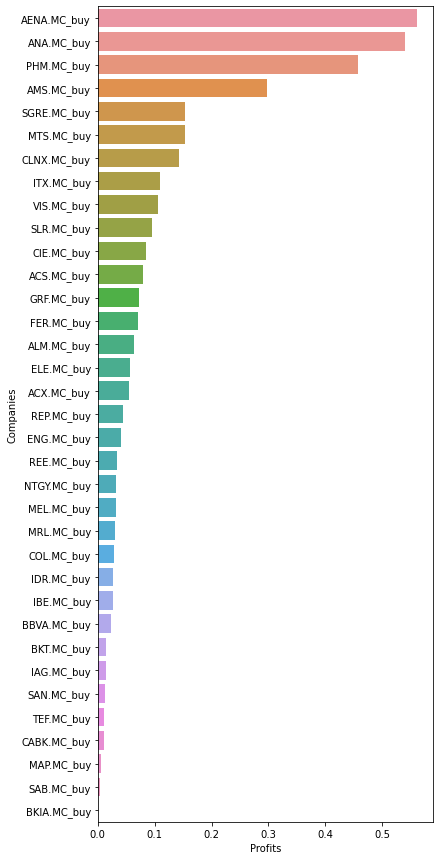

In [14]:
df_graf = df_graf.sort_values('Profits', ascending= False)

f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(data = df_graf, y = df_graf['Companies'], x = df_graf['Profits'])

In [15]:
df_graf_sell = pd.DataFrame(
{
    'Companies' : profits_sell.columns,
    'Profits' : profits_sell.mean()
})

<AxesSubplot:xlabel='Profits', ylabel='Companies'>

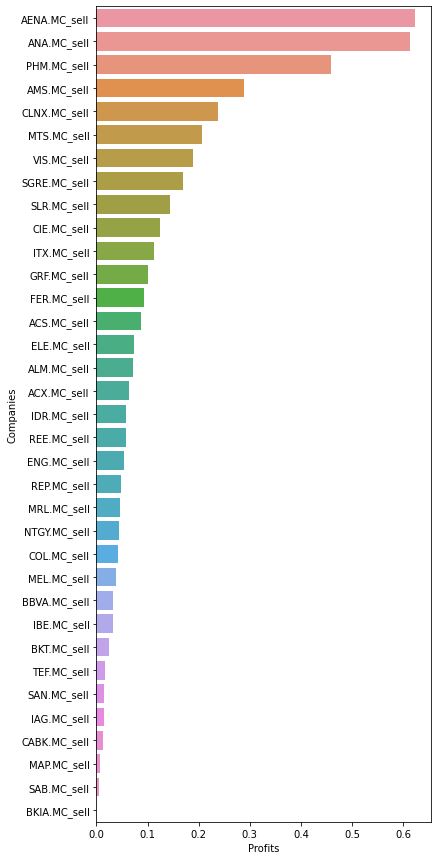

In [16]:
df_graf_sell = df_graf_sell.sort_values('Profits', ascending= False)

f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(data = df_graf_sell, y = df_graf_sell['Companies'], x = df_graf_sell['Profits'])